In [2]:
import pickle
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
% matplotlib inline

In [126]:
# Download Data
raw_nyt = pd.read_pickle('news_dfs/nyt_final_df.pkl')

# Get rid September and include only 2016
nyt = raw_nyt[(raw_nyt.year == 2016)& (raw_nyt.month != 9)]

# Topics Modeling

In [147]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.4, min_df = 15,
                                   stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(nyt.article)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components = 90, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

In [148]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:" + str(int(topic_idx)+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [152]:
transformed_data = nmf.transform(tfidf)

# Top Words per Topic

In [170]:
print_top_words(nmf, tfidf_feature_names, 20)

Topic:1
islamic syria iraq american military fighters carter forces isis pentagon operations mosul isil defense iraqi troops fight intelligence campaign coalition
Topic:2
korea north korean south kim missile koreas norths test seoul ballistic sanctions pyongyang jong koreans range launch american nuclear missiles
Topic:3
european union britain british cameron referendum bloc vote britains leave europe brexit london johnson immigration membership britons exit voters campaign
Topic:4
chinese china beijing xi chinas communist wang li news xinhua online jinping weibo party foreign liu media wu dahlin xis
Topic:5
saudi arabia nimr shiite saudis sheikh iran kingdom sunni arabias executions execution riyadh al prince yemen shiites embassy cleric kingdoms
Topic:6
syrian aleppo syria assad rebel aid talks opposition cease russia geneva nations mistura humanitarian al civilians held areas airstrikes groups
Topic:7
israeli palestinian israel palestinians jerusalem israels netanyahu bank israelis 

# Labels for Each Topic

In [13]:
topics = {1:'Syria Military Operations', 2:'North Korea',
         3:'Brexit',4:'China',
          5: 'Saudi Arabia', 6: 'Syria',
          7: 'Israel/Palestine', 8: 'Taliban',
          9: 'Pope Francis', 10: 'Turkey Coup',
          11: 'Taliban', 12: 'EU Refugee Crisis',
          13: 'Hong Kong', 14: 'Iran',
          15: 'Boko Haram', 16: "Russia",
          17: 'Hong Kong', 18: 'Egypt',
          19: 'Ebola', 20: 'other',
          21: 'El Chapo', 22: 'Zika',
          23: 'Brussels Attack', 24: 'other',
          25: "EgyptAir Crash", 26: "South Africa: Pistorius Trial",
         27: 'Brazil Corruption 1', 28: 'Other', 
         29: 'Taiwan', 30: 'Somalia',
         31: 'Iraq', 32: 'Myanmar: Aung San Suu Kyi',
         33: 'Jordan', 34: 'Nice Attack',
         35: 'Germany' , 36: 'Other', 
         37: 'Lybia' , 38: 'Women Rights', 
         39: 'India', 40: 'Sudan',
         41: 'Fort McMurray Fire', 42: 'Cuba',
         43: 'Al-Qaeda', 44: 'U.K. Politics',
         45: 'Islam', 46: 'EU Refugee Crisis',
         47: 'Bangladesh', 48: 'Medical Services', 
         49:'Turkey', 50: 'Philippines: Duterte',
         51: 'Ashley Olsen Death', 52: 'Saudi-Yemen Gun Trade',
          53: 'Trump Statements', 54: 'Rio Olympics', 
         55:'Australia', 56: 'Panama Papers',
          57: 'Nice Attack', 58: 'Abu Sayyaf', 
         59:'Italy', 60: 'Poland',
          61: 'Pakistan', 62: 'Malaysia Corruption', 
         63:'Spanish Government Deadlock', 64: 'Courts',
         65:'Indonesia', 66: 'Tibet',
          67: 'Japan', 68: 'Elections', 
         69:'Nuclear Weapons', 70: 'other',
          71: 'Police', 72: 'Terrorism', 
         73:'Paris Attack', 74: 'Colombian Peace Deal',
         75:'China Cultural Revolution', 76: 'Obama Foreign Visits',
          77: 'South Africa', 78: 'Brazil Corruption 2', 
         79:'Human Rights',80: 'Hamas',
          81: 'Animals', 82: 'Schools', 
         83:'France', 84: 'Earthquakes',
         85:'Climate Change', 86: 'China-Philippines Maritime Dispute',
          87: 'Other', 88: 'Elections', 
         89:'Brazil Corruption 3', 90: 'Ireland'}

## Cleaning Up Data

In [284]:
final_data = pd.DataFrame(transformed_data).applymap(lambda x: 1 if x>.1 else 0)
final_data.columns = topics.values()
final_data['month'] = [i for i in nyt.month]

by_month = final_data.groupby('month').sum()
for i in range(8):
    by_month.iloc[i] = by_month.iloc[i]/float(np.sum(by_month.iloc[i]))

by_month['Brazil Corruption'] = by_month['Brazil Corruption 1'] + by_month['Brazil Corruption 2'] + by_month['Brazil Corruption 3']
del by_month['Brazil Corruption 1']
del by_month["Brazil Corruption 2"]
del by_month["Brazil Corruption 3"]

In [285]:
by_month.to_pickle('nyt_month.pkl')

# Top Topics for Month

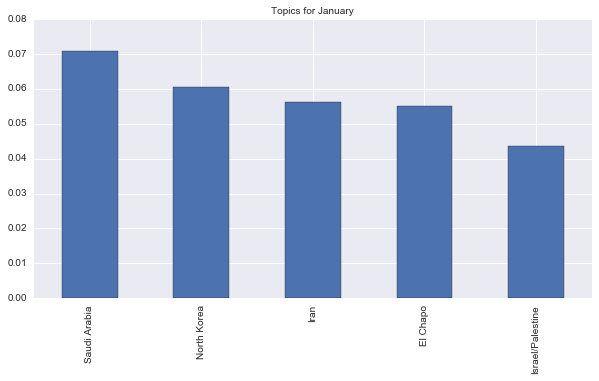

In [5]:
# Syrian Aleppo Advance
# Zika
rc={'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelsize': 25, 'font.size': 10, 'legend.fontsize': 30.0, 'axes.titlesize': 10, "figure.figsize": [10, 5]}
sns.set(rc = rc)
by_month.iloc[0].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for January')

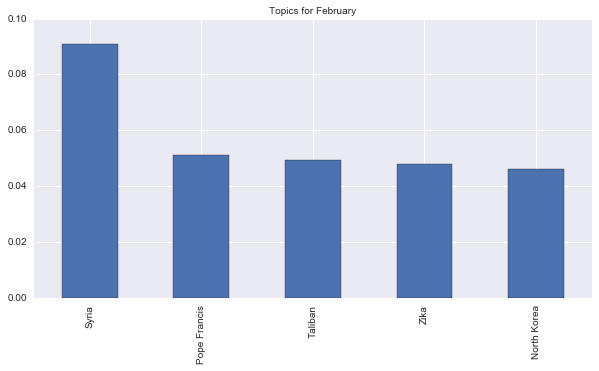

In [14]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[1].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for February')

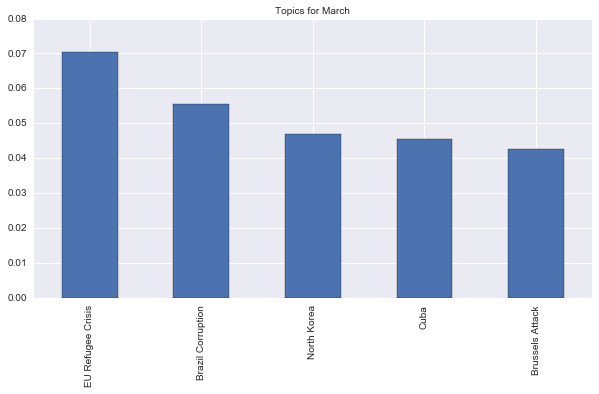

In [13]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[2].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for March')

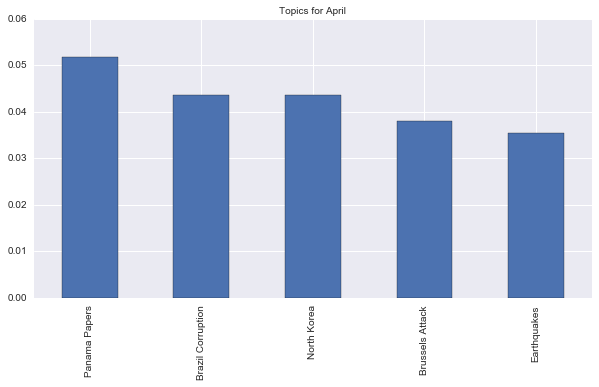

In [12]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[3].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for April')

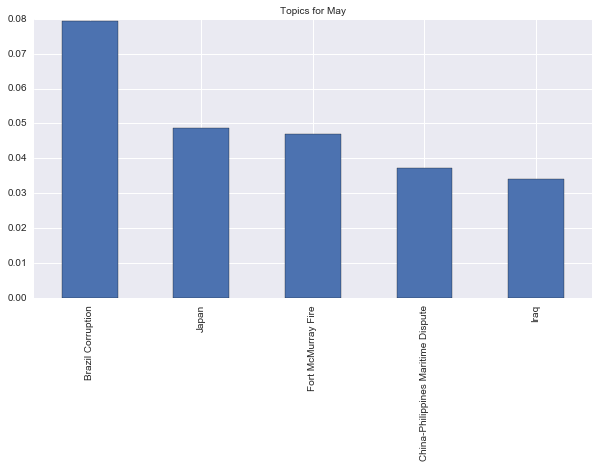

In [15]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[4].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for May')

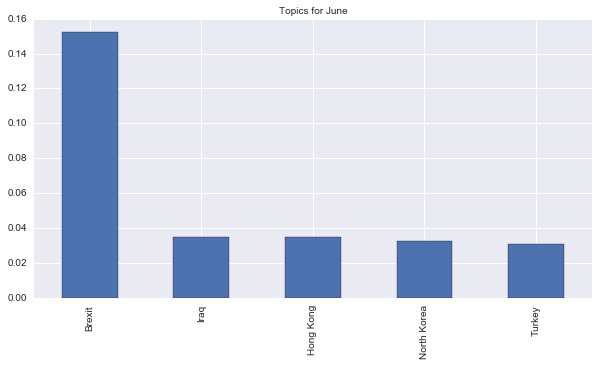

In [17]:
by_month.iloc[5].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for June')

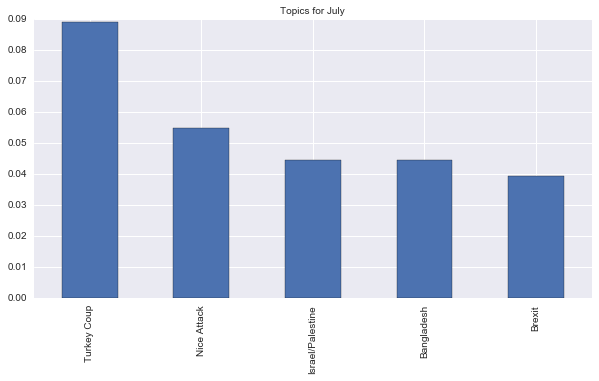

In [18]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[6].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for July')

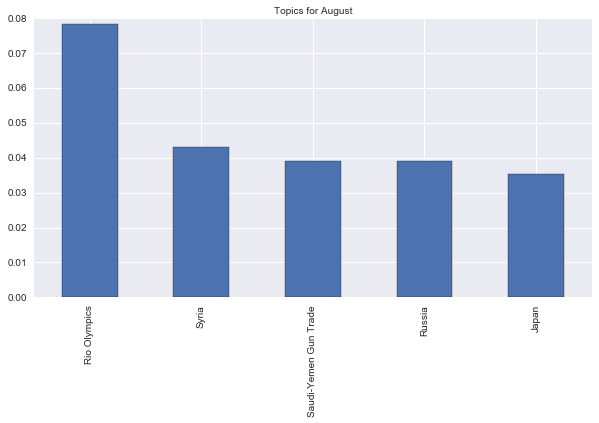

In [19]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[7].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for August')

# Top Topics Per Year

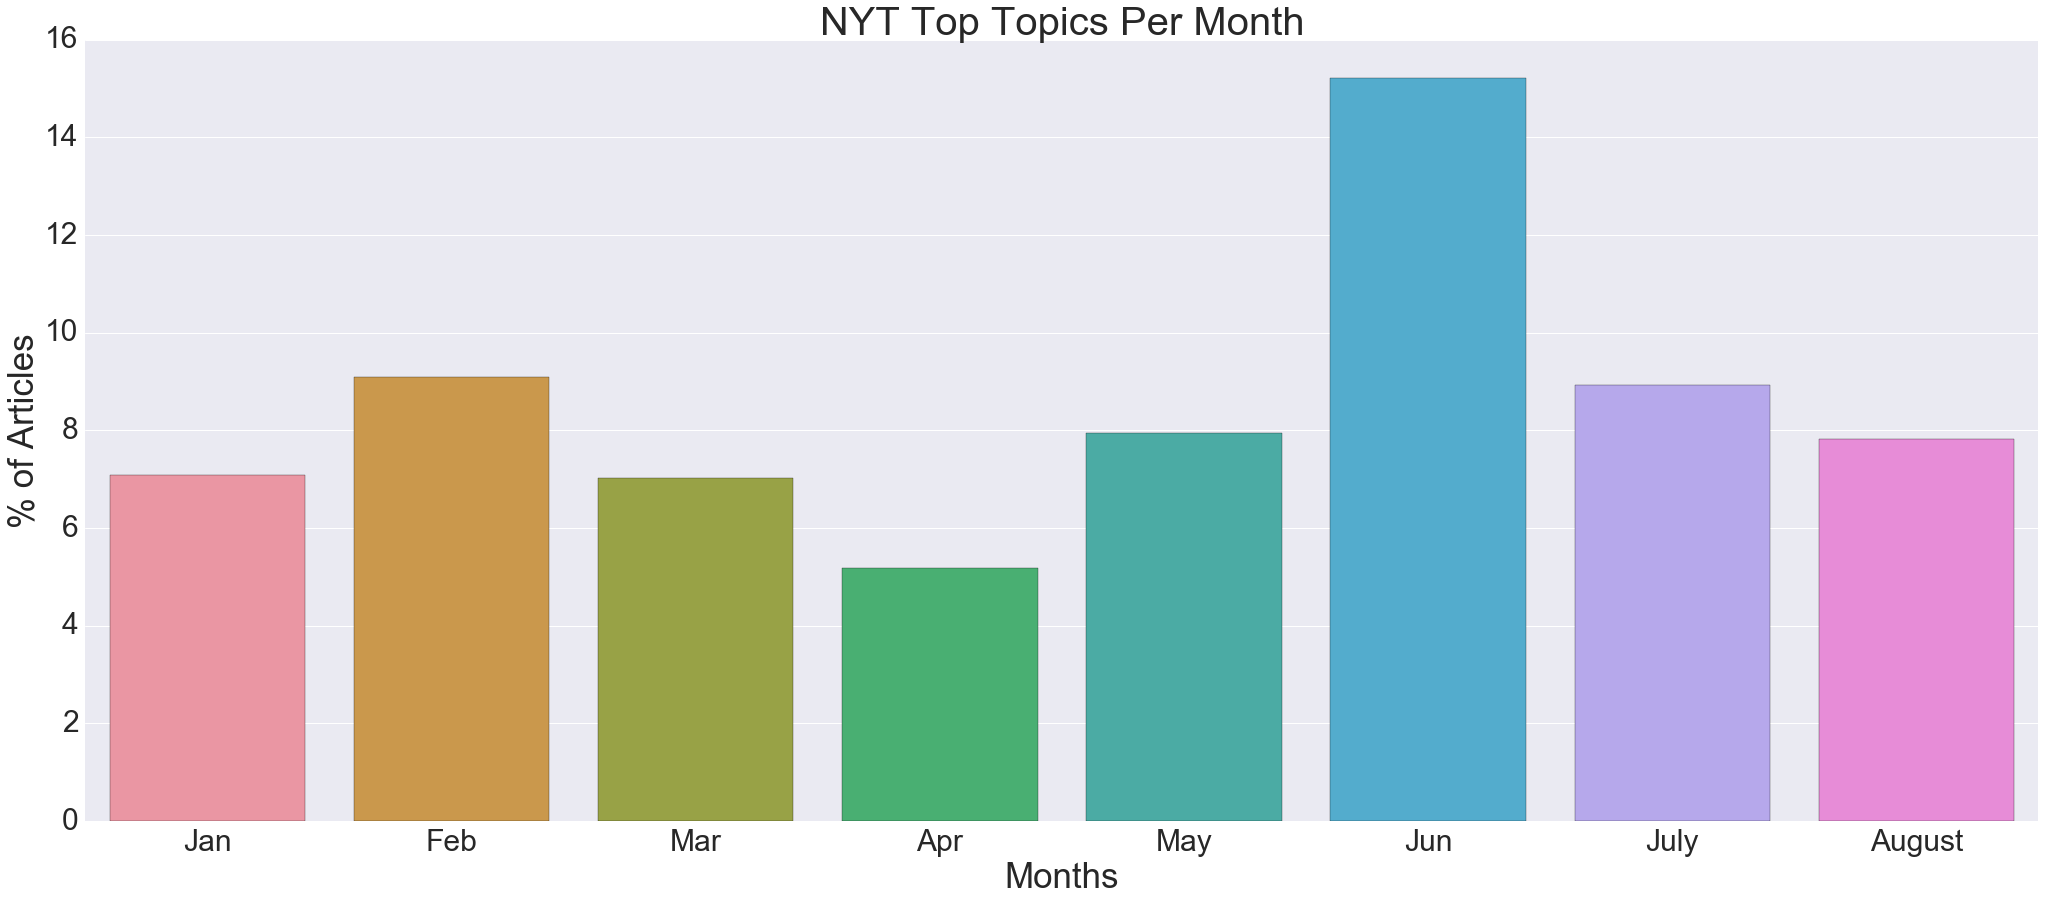

In [21]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "June", "July", 'Aug']

lst = []
topics_ =[]
for i in range(8):
    x = by_month.iloc[i].sort_values(ascending = False).head(1)
    lst.append(x[0]*100)
    topics_.append(x.keys()[0])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", "July", 'August']
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 30.0, 'axes.titlesize': 20, "figure.figsize": [35, 14]}
sns.set(rc = rc)
sns.barplot(x = months, y = lst)
plt.title('NYT Top Topics Per Month', fontsize=40)
plt.xlabel('Months', fontsize=35)
_ = plt.ylabel('% of Articles', fontsize=35)

In [25]:
topics_

['Saudi Arabia',
 'Syria',
 'EU Refugee Crisis',
 'Panama Papers',
 'Brazil Corruption',
 'Brexit',
 'Turkey Coup',
 'Rio Olympics']